<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering customers
# Purpose: to cluster customers by their features.
# Tasks:
1. Dataset loading and analyzing.
2. Data preprocessing.
3. ML: model dev, vizualize.

# Libraries

In [41]:
# libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataset loading and analyzing

In [3]:
# dataset
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [8]:
df['Defaulted'].unique()

array([ 0.,  1., nan])

In [9]:
df['Address']

,Address
0,NBA001
1,NBA021
2,NBA013
3,NBA009
4,NBA008
...,...
845,NBA007
846,NBA002
847,NBA001
848,NBA012


In [10]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


# Data Preprocessing

In [11]:
# removing "Address" column.
df.drop('Address', axis= 1, inplace= True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
df.isna().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [18]:
# removing NaN values
df.dropna(inplace= True)

In [21]:
df.values[:, 1:]

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [22]:
# scaling
X = df.values[:, 1:]
X_prepared = StandardScaler().fit_transform(X)
X_prepared

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

# ML

In [33]:
# model dev
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X_prepared)

KMeans(n_clusters=3)

In [34]:
kmeans.labels_

array([2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2,

In [35]:
kmeans.cluster_centers_

array([[ 1.03258063,  0.25566797,  1.279884  ,  1.3714983 ,  1.23805414,
         1.446919  , -0.12159082,  0.60651028],
       [-0.43715004,  0.13807946, -0.70628763, -0.41092174, -0.03089638,
        -0.09840952,  1.62427355,  0.53873674],
       [-0.14176672, -0.130892  , -0.11177099, -0.25429683, -0.36179336,
        -0.39860131, -0.59494973, -0.39263382]])

In [36]:
# adding cluster labels to the original df
df['cluster'] = kmeans.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [37]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,416.848000,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,419.763975,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025
2,438.731884,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884


### Visualize

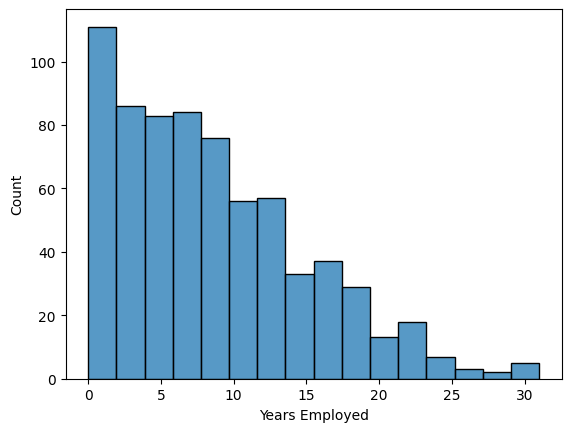

In [47]:
sns.histplot(x= df['Years Employed'])
plt.show()

In [44]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


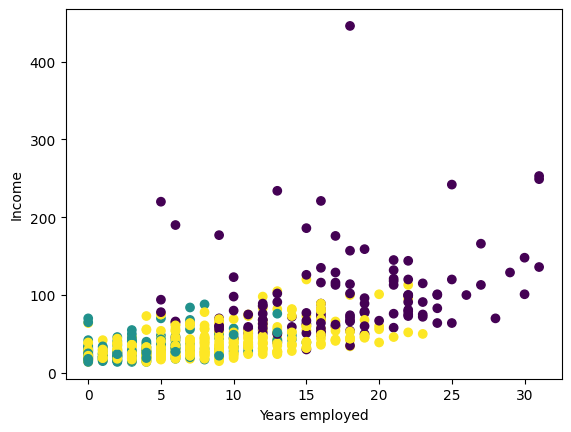

In [50]:
plt.scatter(X[:, 2], X[:, 3], c= kmeans.labels_, cmap= 'viridis')
plt.xlabel('Years employed')
plt.ylabel('Income')
plt.show()